In [35]:
import csv
import math

import matplotlib.pyplot as plt
import numpy as np


def sigmoid(x):
    return ((1 / (1 + math.exp(-x))))


def compute_gradient(W, X, b, y0, weight):
    y = compute_y(W, X, b)
    sigmoid_new = y * (1 - y)
    if weight == 0:
        return X[0] * (y - y0) * sigmoid_new
    elif weight == 1:
        return X[1] * (y - y0) * sigmoid_new
    else:
        return (y - y0) * sigmoid_new


def compute_y(X,W, b):
    return sigmoid(np.dot(X, W) + b)


def get_labels():
    dataset = csv.reader(open("data.csv"))
    dataset_label = []

    x0 = []
    x1 = []
    y0 = []
    y1 = []

    for col in dataset:
        dataset_label.append(
            [[float(col[0].replace("'", "")), float(col[1].replace("'", ""))], int(col[2].replace("'", ""))])
        if int(col[2].replace("'", "")) == 0:
            x0.append(float(col[0].replace("'", "")))
            y0.append(float(col[1].replace("'", "")))
        else:
            x1.append(float(col[0].replace("'", "")))
            y1.append(float(col[1].replace("'", "")))
    return dataset_label


def train(train_label):
    n_epoch = 3000
    Ir = 3 / len(train_label)  # learning_rate
    gradient = [0, 0, 0]
    W = []
    b = np.random.normal(0, 1)
    W.append(np.random.normal(0, 1))
    W.append(np.random.normal(0, 1))

    for i in range(0, n_epoch):
        for w in range(0, 3):
            gradient[w] = 0
            for X in train_label:
                gradient[w] += compute_gradient(W, X[0], b, X[1], w)
        for w in range(0, 2):
            W[w] -= Ir * gradient[w]
            b -= Ir * gradient[2]
    return [W, b]


def model(W, b, test_label):
    for X in test_label:
        # Y = sigmoid(np.dot(W, X[0]) + b)
        Y = compute_y(W, X[0], b)
        if Y >= 0.5:
            X[1] = 1
        else:
            X[1] = 0
    return test_label

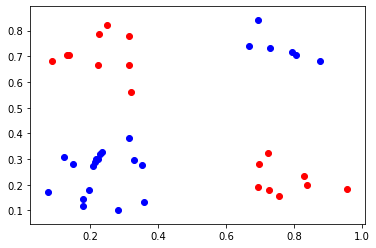

In [58]:
x0 = []
x1 = []
y0 = []
y1 = []

x0_predicted = []
x1_predicted = []
y0_predicted = []
y1_predicted = []

dataset = get_labels()
np.random.shuffle(dataset)

train_value = []
test_value = []

# plot test data
for i in range(0, len(dataset)):
    # split
    if i < np.round(0.8 * len(dataset)):
        train_value.append([[dataset[i][0][0], dataset[i][0][1]], dataset[i][1]])
    else:
        test_value.append([[dataset[i][0][0], dataset[i][0][1]], dataset[i][1]])

for i in range(0, len(test_value)):
    if test_value[i][1] == 0:
        x0.append(test_value[i][0][0])
        y0.append(test_value[i][0][1])
    else:
        x1.append(test_value[i][0][0])
        y1.append(test_value[i][0][1])

plt.scatter(x0, y0, color="blue")
plt.scatter(x1, y1, color="red")
plt.show()
# print(len(test_value))
# print(len(dataset))

In [54]:
W, b = train(train_value)
predicted_label_test = model(W, b, test_value)

In [55]:
predicted_label_test[39][1]

0

In [61]:
test_value

[[[0.28170979323821427, 0.10049548182844054], 0],
 [[0.8780749266106397, 0.6816138355075214], 0],
 [[0.22193406557988657, 0.2989453287015452], 0],
 [[0.22541024547786076, 0.7849380433690659], 1],
 [[0.6949165854182061, 0.8419277337662759], 0],
 [[0.7282375641988699, 0.7308065987566297], 0],
 [[0.08728331335892733, 0.6805493275817509], 1],
 [[0.3153413559214563, 0.7784279200063761], 1],
 [[0.32933110177717606, 0.29559157938897973], 0],
 [[0.3140032229958884, 0.3815888389606202], 0],
 [[0.7551842867752836, 0.15664129087746886], 1],
 [[0.8311817494298697, 0.23545342150104853], 1],
 [[0.13835408856840875, 0.7064175800262155], 1],
 [[0.6954805463650215, 0.18979976882335275], 1],
 [[0.7280305504841853, 0.1798958747190546], 1],
 [[0.3137930264821252, 0.6660710826516161], 1],
 [[0.19638392528167795, 0.18035130809265137], 0],
 [[0.2352427771401009, 0.3257961157546632], 0],
 [[0.8051105680895025, 0.7034287530377589], 0],
 [[0.22884533528156484, 0.3195138543871016], 0],
 [[0.07679885437923806, 0.

In [62]:
predicted_label_test

[[[0.7245530337263707, 0.21785905228097163], 1],
 [[0.18698603965976052, 0.7483082837067193], 0],
 [[0.736573404822285, 0.3708645498799713], 1],
 [[0.8164710021334436, 0.23509377100146342], 1],
 [[0.09197300051201723, 0.608383086413194], 0],
 [[0.16655359137077302, 0.8220567281733527], 0],
 [[0.17491445908410203, 0.6766650601496775], 0],
 [[0.23426401746775438, 0.7641197182707707], 0],
 [[0.21149186772482365, 0.2067736107577487], 0],
 [[0.8103154998249935, 0.2009137689334668], 1],
 [[0.2224934993809251, 0.6663801425123639], 0],
 [[0.8096403084847065, 0.6617261048896805], 1],
 [[0.2352427771401009, 0.3257961157546632], 0],
 [[0.8767957578268822, 0.39853063752167955], 1],
 [[0.6524063790100186, 0.616868328293535], 0],
 [[0.7570611514338346, 0.7036219339265473], 1],
 [[0.7237799438056124, 0.17948715612592459], 1],
 [[0.7719881547653331, 0.6315855030922773], 1],
 [[0.2413189888271617, 0.3935477995202221], 0],
 [[0.3528290378641403, 0.27607750764381994], 0],
 [[0.37071908335777365, 0.340375

In [10]:
correct_pred = 0
uncorrect_pred =0

for i in range(0, 40):
    if(test_value[i][1]== predicted_label_test[i][1]):
        correct_pred += 1
    else:
        uncorrect_pred += 

In [11]:
print(uncorrect_pred)
accuracy = (correct_pred) / len(test_value)
print(accuracy)

0
1.0


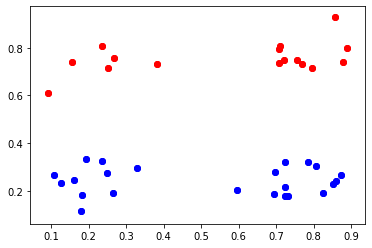

In [29]:
for i in range(0, len(predicted_label_test)):
    if predicted_label_test[i][1] == 0:
        x0_predicted.append(predicted_label_test[i][0][0])
        y0_predicted.append(predicted_label_test[i][0][1])
    else:
        x1_predicted.append(predicted_label_test[i][0][0])
        y1_predicted.append(predicted_label_test[i][0][1])

plt.scatter(x0_predicted, y0_predicted, color="blue")
plt.scatter(x1_predicted, y1_predicted, color="red")
#plt.show()

0
1.0


In [223]:
test_value[0][1]

1

In [217]:
predicted_label_test

[[[0.28170979323821427, 0.10049548182844054], 1],
 [[0.24898826101308705, 0.2737746208691483], 0],
 [[0.8180303588739053, 0.3196442357926113], 1],
 [[0.2224934993809251, 0.6663801425123639], 0],
 [[0.7551284210899903, 0.8324400373264104], 0],
 [[0.45488332247489527, 0.8178702984534343], 0],
 [[0.6775397567049125, 0.2546446760056033], 1],
 [[0.6524063790100186, 0.616868328293535], 0],
 [[0.18547143334342475, 0.8395965706854618], 0],
 [[0.3473961172755702, 0.8579814329973301], 0],
 [[0.736573404822285, 0.3708645498799713], 1],
 [[0.32933110177717606, 0.29559157938897973], 0],
 [[0.42806026733053426, 0.2717600230947724], 1],
 [[0.3233892052644901, 0.8682924854622361], 0],
 [[0.6599653934743636, 0.7385121348957143], 0],
 [[0.6765402590689931, 0.37179635744495637], 1],
 [[0.18698603965976052, 0.7483082837067193], 0],
 [[0.308895977284141, 0.7015963718219937], 0],
 [[0.8187291925535344, 0.7665798508807077], 0],
 [[0.25169935823761397, 0.21301329387604506], 1],
 [[0.3301769381443319, 0.787734

([0.033693001270829394, 0.24467591071134892], -0.11309053891812232)

[[[0.7681198228598035, 0.8467211314541051], 1],
 [[0.6517786217700825, 0.7911959412045397], 1],
 [[0.8262009402595853, 0.1940654121882601], 0],
 [[0.18355828547393044, 0.3411122171446974], 0],
 [[0.8311817494298697, 0.23545342150104853], 0],
 [[0.2413189888271617, 0.3935477995202221], 0],
 [[0.2522363230684295, 0.7143168546662819], 1],
 [[0.1618895241444214, 0.2458276604270763], 0],
 [[0.6944119641695272, 0.7083055150781659], 1],
 [[0.7473478749620656, 0.559096117296864], 1],
 [[0.13835408856840875, 0.7064175800262155], 0],
 [[0.31170602063542563, 0.15721731578108838], 0],
 [[0.3010571751457801, 0.2250071989966574], 0],
 [[0.7948041181207198, 0.715550852904458], 1],
 [[0.7551842867752836, 0.15664129087746886], 0],
 [[0.16655359137077302, 0.8220567281733527], 1],
 [[0.7611240219997901, 0.7336651044440097], 1],
 [[0.721957247988941, 0.7454106169507512], 1],
 [[0.17491445908410203, 0.6766650601496775], 0],
 [[0.590975795661919, 0.7892713872530823], 1],
 [[0.1786838338531739, 0.11825930823

In [11]:
W

[0.40025346588983984, 0.03634862044345162]

In [12]:
b

-0.18956551347553618

In [8]:
W, b = train(train_value)

In [ ]:
predicted_label_test = test(W, b, test_value)